In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from datetime import datetime

In [4]:
X, y = load_diabetes().data, load_diabetes().target.reshape(-1,1)

In [5]:
X.shape, y.shape

((442, 10), (442, 1))

In [83]:
class NN_build(object):
    def __init__(self, eta = 0.005, iterations = 1000, epsilon = 0.01, dims = [10,30,30,1], dropout = 0.5):
        self.eta = eta
        self.epsilon = epsilon
        self.dims = dims
        self.layer = len(dims)
        self.iterations = iterations
        self.dropout = dropout
        
    def fit(self, X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        i = 1
        m_ =len(y)
        cost_ = []
        parameters = {}
        dropout = {}
        
        
        for l in range(1, self.layer):
            parameters['W'+str(l)] = np.random.randn(self.dims[l], self.dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))     
            
        
        while(i != self.iterations):
            time1 = datetime.now()
            
               
            #forward prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            d2 = np.random.rand(A2.shape[0],A2.shape[1]) < self.dropout  #dropout
            A2 = (A2 * d2) / self.dropout  #dropout, divide to keep expected value
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3
            #cost
            cost = self.cost(y_,A3,m_)
            cost_.append(cost)          
            #derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3,A2.T)  # L2 lambda/m * wl
            db3 = (1/m_) * np.sum(dZ3, axis =1 , keepdims=True)
            dZ2 = np.dot(parameters['W3'].T, dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T)
            db2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims=True)
            dZ1 = np.dot(parameters['W2'].T, dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1,A0.T)
            db1 = (1/m_) * np.sum(dZ1, axis =1 , keepdims=True)         
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1
            #inform
            time2 = datetime.now()
            time_step = time2 - time1
            if i % 200 == 0:
                print('epochs_{}::cost:{}::time:{}'.format(i,cost,time_step))
            
            i += 1
        history = pd.DataFrame(cost_ , columns=['cost'])
        plt.figure(figsize = (14,4))
        plt.subplot(1,1,1)
        plt.plot(history.cost)
        plt.show()           
        
        return parameters,A3
    
    
    def cost(self,y_true,y_pred,m_):
        return (1/2*m_ ) * np.sum(np.square(y_true - y_pred))
    
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    

        

epochs_200::cost:863595655.3934324::time:0:00:00.000977
epochs_400::cost:644053838.515877::time:0:00:00.001994
epochs_600::cost:622011569.7451695::time:0:00:00.000998
epochs_800::cost:626485879.6897072::time:0:00:00.000997
epochs_1000::cost:630081401.0212122::time:0:00:00.001000
epochs_1200::cost:628363454.2981577::time:0:00:00.001994
epochs_1400::cost:656083425.1359563::time:0:00:00.000997
epochs_1600::cost:730431863.0007678::time:0:00:00.001995
epochs_1800::cost:546533902.0703163::time:0:00:00.001995
epochs_2000::cost:446665709.6012491::time:0:00:00.002008
epochs_2200::cost:415817526.7220221::time:0:00:00.001993
epochs_2400::cost:435007583.1348291::time:0:00:00.001913
epochs_2600::cost:408910040.4799896::time:0:00:00.001892
epochs_2800::cost:388938352.63170415::time:0:00:00.002989
epochs_3000::cost:397020551.1607944::time:0:00:00.000968
epochs_3200::cost:404532137.0837726::time:0:00:00.001655
epochs_3400::cost:410205289.0079915::time:0:00:00.001981
epochs_3600::cost:381950716.1242874

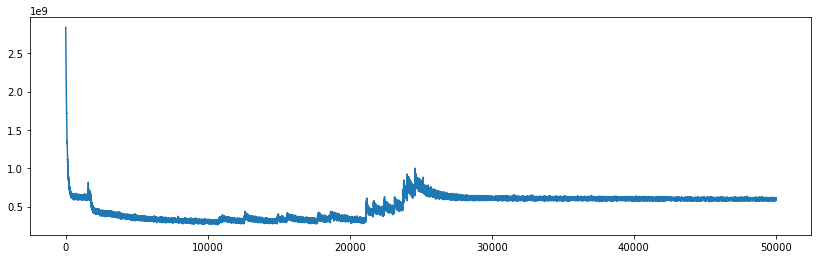

In [84]:
parameters,A3 = NN_build(eta = 0.0005, iterations= 50000, epsilon= 0.01, dims= [10,60,40,1]).fit(X,y)

In [85]:
A3

array([[158.10018993, 141.13029649, 170.9481907 , 150.23064412,
        171.11426791, 158.68779003, 133.04443809, 145.81906658,
        149.66730086, 145.54157856, 137.21524716, 154.48883723,
        132.97463819, 162.67713646, 141.80106447, 162.8794219 ,
        141.17140656, 149.31400414, 145.88643467, 149.54902358,
        145.48605155, 141.89430597, 133.07658137, 149.59100072,
        162.6499416 , 129.00124511, 145.42292659, 158.05003918,
        116.33837957, 166.93229514, 149.8948086 , 128.87905648,
        129.26395819, 145.90037367, 171.1588012 , 175.18867606,
        154.00547596, 137.50061466, 129.01962047, 158.52900693,
        162.2480933 , 141.36693547, 174.88590528, 157.95086214,
        158.04596001, 145.73729898, 163.00853754, 166.67697064,
        129.1800717 , 141.31549136, 154.42528515, 145.18053521,
        162.14474821, 124.50691237, 145.73149634, 141.473512  ,
        137.18858321, 137.56938269, 141.44388875, 133.18390709,
        154.16245745, 162.60197003, 158.

In [86]:
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

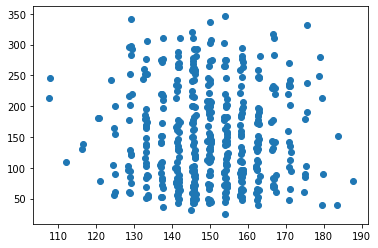

In [87]:
plt.scatter(A3,y)

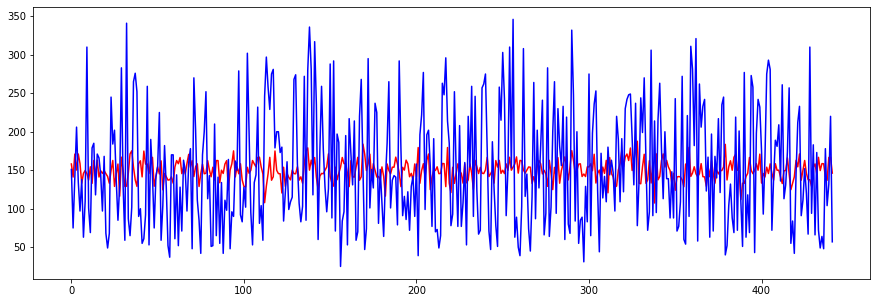

In [88]:
plt.figure(figsize = (15,5))
plt.subplot(1,1,1)
plt.plot(A3.ravel(),'r')
plt.plot(y,'b')
plt.show()

In [89]:
dropout = {}
dropout['d1'] = np.random.rand(parameters['W1'].shape[0],parameters['W1'].shape[1]) < 0.5

In [90]:
parameters['W1'] * dropout['d1']

array([[  -0.        ,    0.        ,   -0.        , -429.84338973,
          -0.        ,    0.        ,    0.        , -193.73804521,
          -0.        ,   13.67310508],
       [-192.57449159,  158.81735631, -326.11481178,   -0.        ,
           1.5736996 ,  160.64176784,   52.20701737, -316.93688718,
        -668.23794835,   -0.        ],
       [ -34.38632897,    0.        ,   -0.        , -433.1490598 ,
         -59.46173434,  127.52582203,  302.97989335, -197.06059692,
          -0.        ,   13.9108722 ],
       [ -35.30852841,    0.        , -248.15519779,   -0.        ,
          -0.        ,    0.        ,  302.05268136, -195.84196569,
        -799.70250813,    0.        ],
       [  -0.        ,    0.        ,   -0.        , -431.1312721 ,
         -58.10301287,    0.        ,  300.89405345,   -0.        ,
        -798.61985734,   13.71735299],
       [  -0.        ,    0.        ,   -0.        , -297.09313365,
         -44.85394443,   -0.        ,  197.92524532,   -0

In [91]:
dropout['d1']

array([[False, False, False,  True, False, False, False,  True, False,
         True],
       [ True,  True,  True, False,  True,  True,  True,  True,  True,
        False],
       [ True, False, False,  True,  True,  True,  True,  True, False,
         True],
       [ True, False,  True, False, False, False,  True,  True,  True,
        False],
       [False, False, False,  True,  True, False,  True, False,  True,
         True],
       [False, False, False,  True,  True, False,  True, False, False,
        False],
       [False, False, False,  True, False, False,  True, False, False,
         True],
       [ True,  True, False, False, False, False,  True, False, False,
         True],
       [ True,  True, False, False,  True,  True, False,  True, False,
         True],
       [False, False,  True, False, False,  True,  True,  True, False,
        False],
       [False, False, False,  True,  True,  True, False, False, False,
        False],
       [ True,  True,  True,  True,  True, 